<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/University_of_Los_Andes_logo.svg/1200px-University_of_Los_Andes_logo.svg.png" width="70" align="left"> 
  <h1> DEPARTAMENTO DE INGENIERIA INDUSTRIAL <br>
  Estrucuturación de Redes Sociales 202120 <br> </h1>
 
 **PROFESORES:** Felipe Montes - Andrés Felipe Usceche - Gianfranco Vietto - Ana Maríaa Guerra - Martha Blanco - Ana María Jaramillo

<center> <bold> Integrantes </bold> </center>

|Apellidos|Nombres|Código|Login|
|:---:|:---:|:---:|:---:|
|*Apellidos 1*|*Nombres 1*|*Código 1*|*login 1*|
|*Apellidos 2*|*Nombres 2*|*Código 2*|*login 2*|

<h1><center> Taller 1 </center></h1>
<h2><center>Identificar situaciones problemáticas en las cuales estudiar la estructura de redes es relevante</center></h2>

El 29 de noviembre de 2010, se enfrentaron FC Barcelona y Real Madrid en el Camp Nou para la Liga BBVA. El resultado del partido fue 5 – 0 a favor del equipo blaugrana quien jugaba al mando de Pep Guardiola para ese entonces (Goal, s.f). En anexos podrán encontrar las matrices de adyacencia para cada uno de los equipos durante el partido. En estas matrices, las filas y columnas corresponden a los jugadores de cada equipo y los cruces entre ellas contienen la cantidad de pases que el jugador de una fila le hizo al jugador de una columna y los que el jugador de la fila i convirtió en el gol j (Ver Matrices Barca 5 RM 0 (Liga 2010 - 2011).xlsx).<br>
El objetivo de este ejercicio es entender el éxito del juego de Braca y que pudo haber hecho el Real Madrid para evitar la derrota.<br>

Para lo anterior por favor sigan los siguientes pasos:

1) Coloquen aquí las librerías que van a usar

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path
import itertools
import plotly.express as px

base_dir = Path.cwd()
data_dir = base_dir / 'data'

#Create if they don't exist
Path(data_dir).mkdir(parents=True, exist_ok=True)

2) Carguen el archivo ``Matrices Barca 5 RM 0 (Liga 2010 - 2011).xlsx``, teniendo presente que este se encuentra en formato matricial

In [501]:
df_barca = pd.read_excel(data_dir/'Matrices Barca 5 RM 0 (Liga 2010 - 2011).xlsx', index_col=0, sheet_name='Barcelona')
df_real = pd.read_excel(data_dir/'Matrices Barca 5 RM 0 (Liga 2010 - 2011).xlsx', index_col=0, sheet_name='Real Madrid')

3) Construyan las redes para cada equipo, Barca y Real Madrid, siguiendo la siguiente lógica:
- Los nodos representan a los jugadores de cada equipo.
- Los arcos se forman cuando un jugador le hace al menos un pase a otro jugador. El peso asociado a estos arcos corresponde a la cantidad de pases que un jugador le hizo al otro.

*Nota: Tienen que determinar si es una red dirigida o no*

In [502]:
# Difinición de Redes
barca = nx.DiGraph(name='barca')
real = nx.DiGraph(name='real')

In [503]:
# Agregar los nodos
barca.add_nodes_from([[i, dict({'Gol':j})] for i, j in zip(df_barca.index.values, df_barca.Gol.values)])
real.add_nodes_from([[i, dict({'Gol':j})] for i, j in zip(df_real.index.values, df_real.Gol.values)if i != 'Gol'] )


In [504]:
# Agregar los arcos
barca.add_edges_from([[i, j, dict({'pases':df_barca.loc[i,j]})] for i, j in itertools.product(df_barca.index, df_barca.columns) if df_barca.loc[i,j] != 0])
real.add_edges_from([[i, j, dict({'pases':df_real.loc[i,j]})] for i, j in itertools.product(df_real.index, df_real.columns) if df_real.loc[i,j] != 0])


4)	Visualicen las redes, mostrando los nombres de cada jugador y los pases entre ellos

*Nota: exploren las diversas visualizaciones*

In [505]:
def plot_dynamic_widths(red):
    widths = nx.get_edge_attributes(red, 'pases')
    nodelist = red.nodes()

    colors = []
    
    for i, dicc in list(red.nodes.data()):
        if i == 'Gol':
            colors.append('pink')
        elif dicc['Gol'] == 0:
            colors.append('lightblue')
        else:
            colors.append('lightgreen')
    
    plt.figure(figsize=(12,12))

    pos = nx.spring_layout(red, k=0.7, seed=8)
    nx.draw_networkx_nodes(red,
                           pos=pos,
                           nodelist=nodelist,
                           node_size=500,
                           node_color=colors)
    nx.draw_networkx_edges(red,
                           pos=pos,
                           edgelist = widths.keys(),
                           width=np.array(list(widths.values()))/4,
                           arrowsize= 20,
                           arrow=True,
                           edge_color='salmon',
                           alpha=0.9)
    nx.draw_networkx_labels(red, 
                            pos=pos,
                            labels=dict(zip(nodelist,nodelist)),
                            font_color='black')

    plt.box(False)
    plt.show()

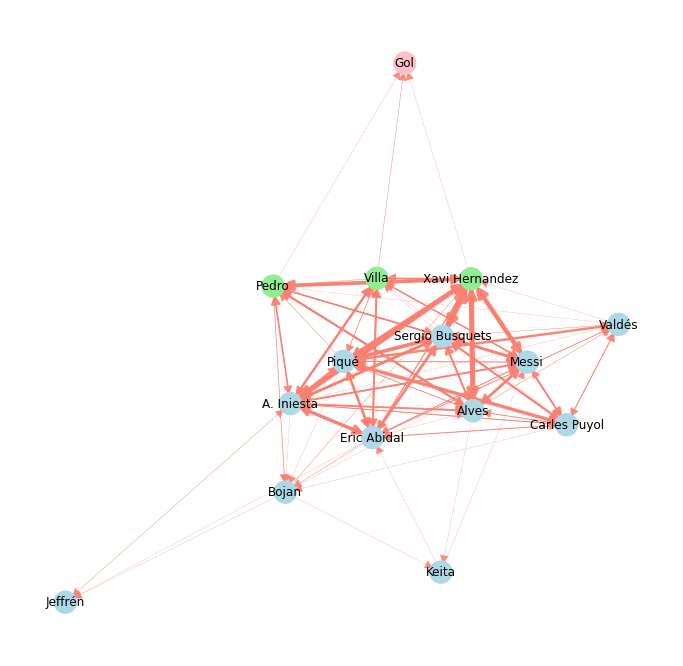

In [506]:
plot_dynamic_widths(barca)

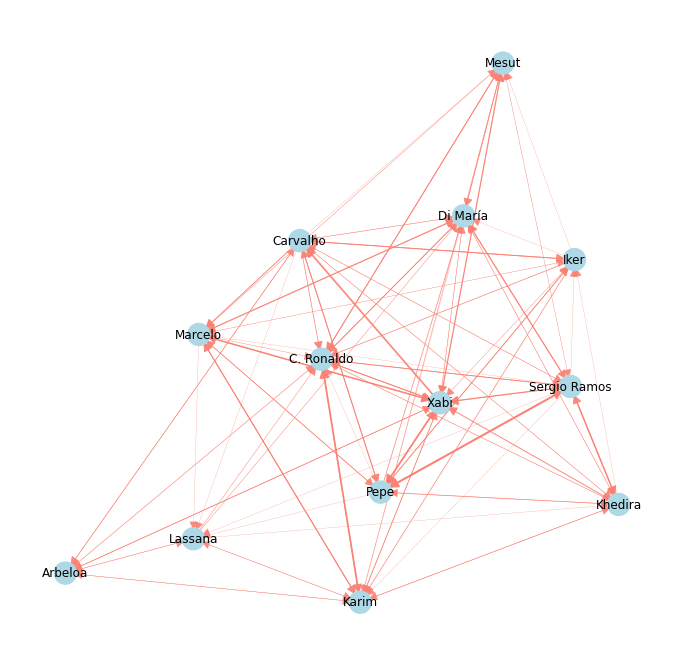

In [507]:
plot_dynamic_widths(real)

5)	¿Cuál es la sucesión de pases más corta entre *Charles Puyol* y el *Gol* en el Barcelona? ¿Cuál es la suma de pases entre jugadores hay en esa sucesión?

In [508]:
puyol_gol = nx.shortest_path(barca, source='Carles Puyol', target='Gol')
puyol_gol

['Carles Puyol', 'Xavi Hernandez', 'Gol']

6)	¿Quienes son los jugadores que interactuaron, ya sea realizando pases o recibiendolos, con los autores de los goles (no presenten repetidos)?

In [509]:
goleadores = []
for (n, d) in barca.nodes(data=True):
    if d['Gol'] > 0:
        goleadores.append(n)

In [510]:
neighbors = []
for g in goleadores:
    for n in barca.neighbors(g):
        if n != 'Gol':
            neighbors.append(n)
        else:
            continue

neighbors = set(neighbors)
print(neighbors)

{'Messi', 'Bojan', 'Pedro', 'Carles Puyol', 'Eric Abidal', 'Xavi Hernandez', 'Alves', 'Sergio Busquets', 'A. Iniesta', 'Villa', 'Piqué'}


7) ¿Cuál es el jugador del Barcelona y del Real Madrid que más pases recibió?

In [511]:
top_pases_barca = sorted(list(barca.in_degree(barca.nodes, weight='pases')), key=lambda tup: tup[1], reverse=True)[0]
top_pases_real = sorted(list(real.in_degree(real.nodes, weight='pases')), key=lambda tup: tup[1], reverse=True)[0]
print(f'Barca: {top_pases_barca} \nReal: {top_pases_real}')

Barca: ('Xavi Hernandez', 110) 
Real: ('C. Ronaldo', 35)


8)	Grafique la distribución de los grados de cada equipo

In [512]:
df_dis = pd.DataFrame(columns=['pases','equipo'])

for i, red in enumerate([barca, real]):
    degrees = list(red.degree(red.nodes, weight='pases'))
    data_y = [i[1] for i in degrees]
    for y in data_y:
        df_dis = df_dis.append({'pases':y, 'equipo':red.name},ignore_index=True)

In [514]:
fig = px.histogram(df_dis, x="pases",color='equipo',
                   marginal="box" 
                  )
fig.show()

9)	Bajo la información que estudiaron ¿Qué le recomendaría a Real Madrid?

``Escriba aquí su respuesta``



